In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from qiskit import QuantumCircuit
from qiskit.result import ProbDistribution
from qiskit.visualization import plot_distribution
from circuit_knitting.cutting.cutqc import reconstruct_full_distribution, cut_circuit_wires, evaluate_subcircuits
import matplotlib.pyplot as plt
from utils import save_cuts, save_probs, save_reconstructed_probs

In [4]:
FILE_PREFIX = '5-qubits-GHZ'

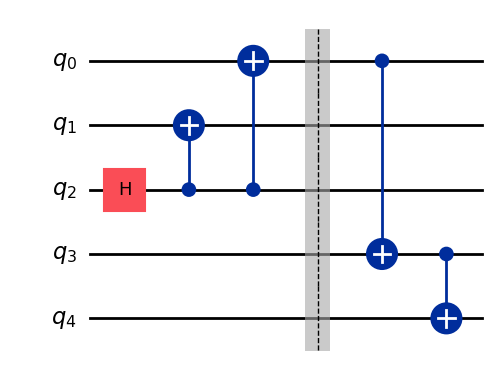

In [5]:
test = QuantumCircuit(5)
test.h(2)
test.cx(2, 1)
test.cx(2, 0)
test.barrier()
test.cx(0, 3)
test.cx(3, 4)
test.draw('mpl', filename=f"{FILE_PREFIX}-circuit.png")

In [6]:
cuts = cut_circuit_wires(circuit=test, method="manual", subcircuit_vertices=[[0,1], [2,3]])
save_cuts(cuts, FILE_PREFIX)

--------------------
num_cuts = 3
subcircuit 0
ρ qubits = 0, O qubits = 3, width = 5, effective = 2, depth = 3, size = 3
               ┌───┐ ░ 
q_0: ──────────┤ X ├─░─
          ┌───┐└─┬─┘ ░ 
q_1: ─────┤ X ├──┼───░─
     ┌───┐└─┬─┘  │   ░ 
q_2: ┤ H ├──■────■───░─
     └───┘           ░ 
q_3: ────────────────░─
                     ░ 
q_4: ────────────────░─
                     ░ 
subcircuit 1
ρ qubits = 3, O qubits = 0, width = 3, effective = 3, depth = 2, size = 2
               
q_0: ──■───────
     ┌─┴─┐     
q_1: ┤ X ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
Estimated cost = 2.048e+03
--------------------
Saving cuts as JSON...


In [7]:
subcircuit_instance_probabilities = evaluate_subcircuits(cuts)
save_probs(subcircuit_instance_probabilities,FILE_PREFIX)

Saving probabilities as JSON...


In [8]:
reconstructed_probabilities = reconstruct_full_distribution(
    test, subcircuit_instance_probabilities, cuts
)
save_reconstructed_probs(reconstructed_probabilities, FILE_PREFIX)

Saving reconstructed probabilities as JSON...


In [9]:
reconstructed_distribution = {
    i: prob for i, prob in enumerate(reconstructed_probabilities)
}

reconstructed_dict_bitstring = ProbDistribution(
    data=reconstructed_distribution
).binary_probabilities(num_bits=5)

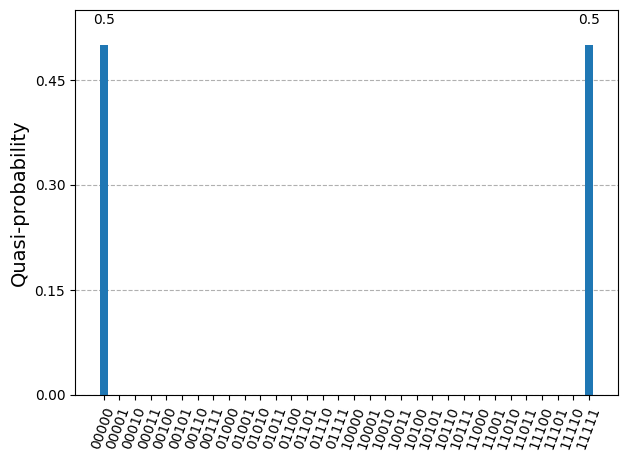

In [10]:
fig = plot_distribution(reconstructed_dict_bitstring)
fig.savefig(f"{FILE_PREFIX}-circuit-cutting-test.png")
display(fig)